#### Prediction  for the customer retention

In [1]:
### Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Dataset Url = "https://compunnel-my.sharepoint.com/:x:/g/personal/subhankar_khandai_compunneldigital_com/ESLybPgtS09Nmb4RlAdzVLMBBVd0P9O_LLs-8sPru1HMfw?e=WwRwJ6/Retention%20CP%20prediction.csv"

In [2]:
## Reading the data file 
data = pd.read_excel("Retention_CP_prediction.xlsx")

In [3]:
data.head(10) # Top 10 Rows of the dataset 

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   
5  Breakfast Foods    Frozen Foods        Food                      4.08   
6  Breakfast Foods    Frozen Foods        Food                      5.44   
7  Breakfast Foods    Frozen Foods        Food                      3.74   
8  Breakfast Foods    Frozen Foods        Food                      4.08   
9  Breakfast Foods    Frozen Foods        Food                      9.72   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                        4           Bag Stuffers   
1                   2.5944                        3  Cash Register Lottery   
2                   1.3616                        2    High Roller Savings   
3                   1.1776                        2  Cash Register Lottery   
4                   1.4280                        3       Double Down Sale   
5                   1.4688                        3       Double Down Sale   
6                   2.5568                        4  Cash Register Lottery   
7                   1.6082                        2  Cash Register Lottery   
8                   1.4688                        3  Cash Register Lottery   
9                   4.5684                        3    High Roller Savings   

  sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0           USA              M      F  ...         18670        5415   
1           USA              M      M  ...         18670        5415   
2           USA              S      F  ...         18670        5415   
3           USA              M      F  ...         18670        5415   
4           USA              M      M  ...         18670        5415   
5           USA              M      F  ...         18670        5415   
6           USA              S      F  ...         18670        5415   
7           USA              S      M  ...         18670        5415   
8           USA              S      F  ...         18670        5415   
9           USA              S      F  ...         18670        5415   

  meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0      3610          1           1          1             1        1   
1      3610          1           1          1             1        1   
2      3610          1           1          1             1        1   
3      3610          1           1          1             1        1   
4      3610          1           1          1             1        1   
5      3610          1           1          1             1        1   
6      3610          1           1          1             1        1   
7      3610          1           1          1             1        1   
8      3610          1           1          1             1        1   
9      3610          1           1          1             1        1   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  
5               Radio   50.79  
6     In-Store Coupon   95.78  
7  Daily Paper, Radio   59.86  
8  Daily Paper, Radio   59.86  
9  Daily Paper, Radio   84.16  

[10 rows x 40 columns]

In [4]:
# information about the columns of the dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [5]:
# Shape(Number of Rows and Columns) and Size(Number of Entries) of the dataset
shape= data.shape
print("Shape of the dataset: ", shape)
size = data.size
print("Size of the dataset: ", size)

Shape of the dataset:  (60428, 40)
Size of the dataset:  2417120


In [6]:
# Name of the columns available 
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [7]:
# Checking if there are any missing values 

data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

#### *`There are no missing values`*

In [8]:
## Dropping the ducplicates if there are any

data = data.drop_duplicates()

In [9]:
data.shape

(60428, 40)

#### *` No Duplicates Values`*

## *`EDA`*

To find the which feature most affect the prediction of cost for customer retention.

In [10]:
## Statistical Summary of the data 
data.describe()

store_sales(in millions)  store_cost(in millions)  \
count              60428.000000             60428.000000   
mean                   6.541031                 2.619460   
std                    3.463047                 1.453009   
min                    0.510000                 0.163200   
25%                    3.810000                 1.500000   
50%                    5.940000                 2.385600   
75%                    8.670000                 3.484025   
max                   22.920000                 9.726500   

       unit_sales(in millions)  total_children  avg_cars_at home(approx)  \
count             60428.000000    60428.000000              60428.000000   
mean                  3.093169        2.533875                  2.200271   
std                   0.827677        1.490165                  1.109644   
min                   1.000000        0.000000                  0.000000   
25%                   3.000000        1.000000                  1.000000   
50%                   3.000000        3.000000                  2.000000   
75%                   4.000000        4.000000                  3.000000   
max                   6.000000        5.000000                  4.000000   

       num_children_at_home  avg_cars_at home(approx).1           SRP  \
count          60428.000000                60428.000000  60428.000000   
mean               0.829351                    2.200271      2.115258   
std                1.303424                    1.109644      0.932829   
min                0.000000                    0.000000      0.500000   
25%                0.000000                    1.000000      1.410000   
50%                0.000000                    2.000000      2.130000   
75%                1.000000                    3.000000      2.790000   
max                5.000000                    4.000000      3.980000   

       gross_weight    net_weight  ...    store_sqft  grocery_sqft  \
count  60428.000000  60428.000000  ...  60428.000000  60428.000000   
mean      13.806433     11.796289  ...  27988.477494  19133.799696   
std        4.622693      4.682986  ...   5701.022090   3987.395735   
min        6.000000      3.050000  ...  20319.000000  13305.000000   
25%        9.700000      7.710000  ...  23593.000000  16232.000000   
50%       13.600000     11.600000  ...  27694.000000  18670.000000   
75%       17.700000     16.000000  ...  30797.000000  22123.000000   
max       21.900000     20.800000  ...  39696.000000  30351.000000   

        frozen_sqft     meat_sqft    coffee_bar   video_store     salad_bar  \
count  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000   
mean    5312.852552   3541.846280      0.612646      0.354157      0.587956   
std     1575.907263   1050.471635      0.487150      0.478261      0.492207   
min     2452.000000   1635.000000      0.000000      0.000000      0.000000   
25%     4746.000000   3164.000000      0.000000      0.000000      0.000000   
50%     5062.000000   3375.000000      1.000000      0.000000      1.000000   
75%     5751.000000   3834.000000      1.000000      1.000000      1.000000   
max     9184.000000   6122.000000      1.000000      1.000000      1.000000   

       prepared_food       florist          cost  
count   60428.000000  60428.000000  60428.000000  
mean        0.587956      0.562603     99.262366  
std         0.492207      0.496069     30.011257  
min         0.000000      0.000000     50.790000  
25%         0.000000      0.000000     69.650000  
50%         1.000000      1.000000     98.520000  
75%         1.000000      1.000000    126.620000  
max         1.000000      1.000000    149.750000  

[8 rows x 23 columns]

*Most of the data seems to be quite evenly distributed.*
Data is not skewed

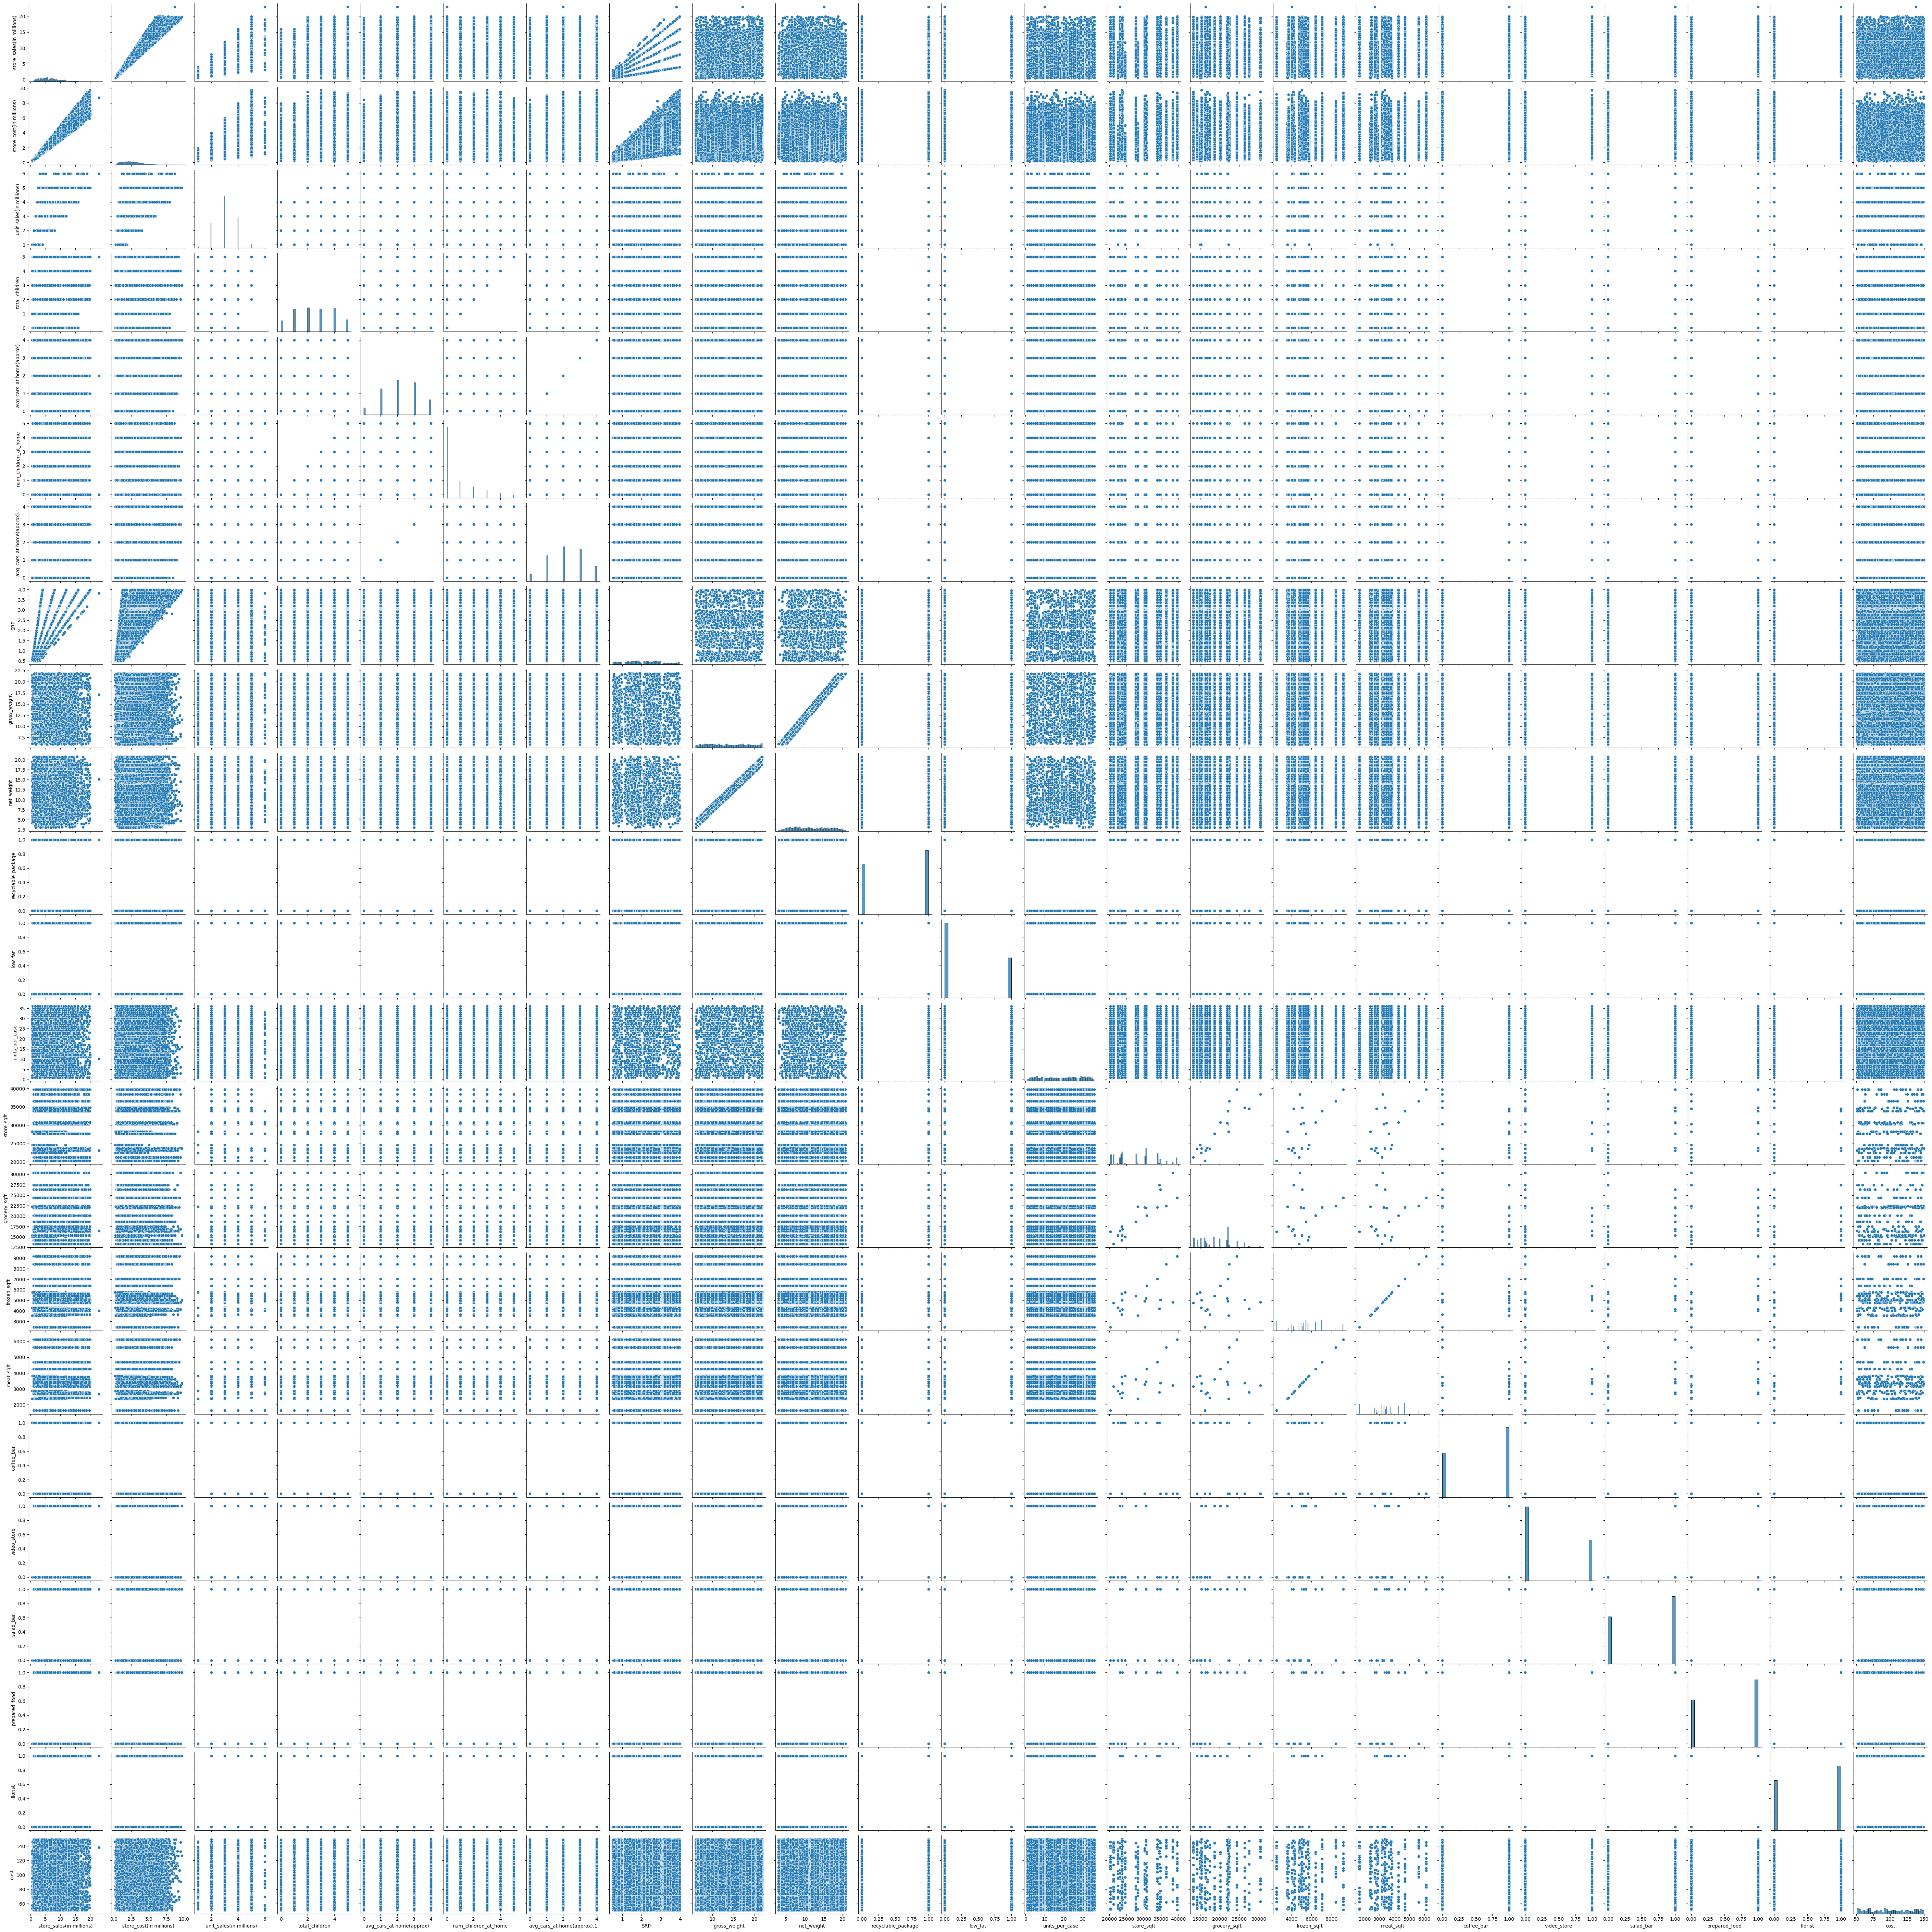

In [11]:
sns.pairplot(data)

In [12]:
# Creating heatmap for the dataset for.

plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(), annot=True)

<AxesSubplot:>

*`Strong Positive Correlation Between Features are those which have threshold values greater than 0.8 
Strong Negative Correlation Between Features are those which have threshold values less than -0.8 `*

Features having Strong Positive Correlation and threshold greater than 0.8

1. Salad_bar and Prepared_foor (Threshold 1)
2. avg_cars_at home(approx) and avg_cars_at home(approx).1 (Threshold 1)
3. meat_sqft and frozen_sqft (Threshold 1)
4. net_wight and gross_weight (Threshold 0.99)
5. Store_sales and store_cost (0.95)
6. grocery_sqft and store_sqft (0.91)
7. SRP and store_sales(in millions) ( 0.83)
8. SRP and store_cost(in millions) ( 0.8)



Removing these feature from my dataset

salad_bar, gross_weight, avg_cars_at_home(approx).1, mean_sqft, store_sales(in millions), store_cost(in millions), store_sqft

In [13]:
data = data.drop(columns=['salad_bar', 'gross_weight', 'avg_cars_at home(approx).1', 'meat_sqft', 'store_sales(in millions)',
                          'store_cost(in millions)','store_sqft'])
data.head()

food_category food_department food_family  unit_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                        4   
1  Breakfast Foods    Frozen Foods        Food                        3   
2  Breakfast Foods    Frozen Foods        Food                        2   
3  Breakfast Foods    Frozen Foods        Food                        2   
4  Breakfast Foods    Frozen Foods        Food                        3   

          promotion_name sales_country marital_status gender  total_children  \
0           Bag Stuffers           USA              M      F               1   
1  Cash Register Lottery           USA              M      M               0   
2    High Roller Savings           USA              S      F               4   
3  Cash Register Lottery           USA              M      F               2   
4       Double Down Sale           USA              M      M               0   

             education  ... store_city store_state grocery_sqft  frozen_sqft  \
0  Partial High School  ...      Salem          OR        18670         5415   
1     Bachelors Degree  ...      Salem          OR        18670         5415   
2  Partial High School  ...      Salem          OR        18670         5415   
3   High School Degree  ...      Salem          OR        18670         5415   
4  Partial High School  ...      Salem          OR        18670         5415   

  coffee_bar  video_store prepared_food  florist          media_type    cost  
0          1            1             1        1  Daily Paper, Radio  126.62  
1          1            1             1        1  Daily Paper, Radio   59.86  
2          1            1             1        1  Daily Paper, Radio   84.16  
3          1            1             1        1     In-Store Coupon   95.78  
4          1            1             1        1               Radio   50.79  

[5 rows x 33 columns]

## *` Numerical Columns`*

In [14]:
lst_column = []
for column in data.columns:
    if(data[column].dtype != 'O'):
        lst_column.append(column)
        


In [15]:
rows = 3
columns = 5
count = 0 
fig, axs = plt.subplots(rows, columns, figsize=(20, 12))
for i in range(rows):
    for j in range(columns):
        sns.histplot(ax = axs[i, j], data=data, x= lst_column[count], kde=True)
        count += 1

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
sns.histplot(ax = axs[0], data=data, x= lst_column[-1], kde=True)
sns.histplot(ax = axs[1], data=data, x= lst_column[-2], kde=True)

<AxesSubplot:xlabel='florist', ylabel='Count'>

*`Note`* - Charts shows two bins considered as categoical values.
So, we need to perform another visualization with cost column for better understanding how categorical valeus affect cost

## *` Categorical Columns `*

In [17]:
lst_cat = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist']

In [18]:
rows = 2
columns = 3
count = 0

fig, axs = plt.subplots(rows, columns, figsize=(12, 8))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax = axs[i, j], data=data.groupby(lst_cat[count])['cost'].mean().to_frame().reset_index(), 
                     x= lst_cat[count], y='cost')
        count += 1

As we can see that there is no difference between cost and recyclable_package and other is low_fat.
So, we can remove these two columns.

In [19]:
data = data.drop(columns = ['recyclable_package', 'low_fat'])
data.head()

food_category food_department food_family  unit_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                        4   
1  Breakfast Foods    Frozen Foods        Food                        3   
2  Breakfast Foods    Frozen Foods        Food                        2   
3  Breakfast Foods    Frozen Foods        Food                        2   
4  Breakfast Foods    Frozen Foods        Food                        3   

          promotion_name sales_country marital_status gender  total_children  \
0           Bag Stuffers           USA              M      F               1   
1  Cash Register Lottery           USA              M      M               0   
2    High Roller Savings           USA              S      F               4   
3  Cash Register Lottery           USA              M      F               2   
4       Double Down Sale           USA              M      M               0   

             education  ... store_city store_state grocery_sqft  frozen_sqft  \
0  Partial High School  ...      Salem          OR        18670         5415   
1     Bachelors Degree  ...      Salem          OR        18670         5415   
2  Partial High School  ...      Salem          OR        18670         5415   
3   High School Degree  ...      Salem          OR        18670         5415   
4  Partial High School  ...      Salem          OR        18670         5415   

  coffee_bar  video_store prepared_food  florist          media_type    cost  
0          1            1             1        1  Daily Paper, Radio  126.62  
1          1            1             1        1  Daily Paper, Radio   59.86  
2          1            1             1        1  Daily Paper, Radio   84.16  
3          1            1             1        1     In-Store Coupon   95.78  
4          1            1             1        1               Radio   50.79  

[5 rows x 31 columns]

In [20]:
lst_cat_column = []
for column in data.columns:
    if(data[column].dtype == 'O'):
        lst_cat_column.append(column)
        


In [21]:
rows = 3
columns = 5
count = 0

fig, axs = plt.subplots(rows, columns, figsize=(40, 40))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax = axs[i, j], 
                    data=data.groupby(lst_cat_column[count])['cost'].mean().sort_values().to_frame().reset_index(),
                    x=lst_cat_column[count], y='cost')
        axs[i,j].tick_params(axis='x', rotation = 90)
        count += 1

[Food_category, food_department, food_family, brand_name , houseowner, gender, marital_status, 
member_card, education, avg.yearly_income, sale_country, occupation] 

The above columns have no difference or the differences are to small. 
So. let's remove them

In [22]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'net_weight', 'units_per_case', 'store_type', 'store_city',
       'store_state', 'grocery_sqft', 'frozen_sqft', 'coffee_bar',
       'video_store', 'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [23]:
data.drop(columns= ['food_category', 'food_department', 'food_family', 'brand_name' , 'houseowner', 'gender', 'marital_status',
                    'member_card', 'education', 'avg. yearly_income', 'sales_country', 'occupation'])
data.head()

food_category food_department food_family  unit_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                        4   
1  Breakfast Foods    Frozen Foods        Food                        3   
2  Breakfast Foods    Frozen Foods        Food                        2   
3  Breakfast Foods    Frozen Foods        Food                        2   
4  Breakfast Foods    Frozen Foods        Food                        3   

          promotion_name sales_country marital_status gender  total_children  \
0           Bag Stuffers           USA              M      F               1   
1  Cash Register Lottery           USA              M      M               0   
2    High Roller Savings           USA              S      F               4   
3  Cash Register Lottery           USA              M      F               2   
4       Double Down Sale           USA              M      M               0   

             education  ... store_city store_state grocery_sqft  frozen_sqft  \
0  Partial High School  ...      Salem          OR        18670         5415   
1     Bachelors Degree  ...      Salem          OR        18670         5415   
2  Partial High School  ...      Salem          OR        18670         5415   
3   High School Degree  ...      Salem          OR        18670         5415   
4  Partial High School  ...      Salem          OR        18670         5415   

  coffee_bar  video_store prepared_food  florist          media_type    cost  
0          1            1             1        1  Daily Paper, Radio  126.62  
1          1            1             1        1  Daily Paper, Radio   59.86  
2          1            1             1        1  Daily Paper, Radio   84.16  
3          1            1             1        1     In-Store Coupon   95.78  
4          1            1             1        1               Radio   50.79  

[5 rows x 31 columns]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   unit_sales(in millions)   60428 non-null  int64  
 4   promotion_name            60428 non-null  object 
 5   sales_country             60428 non-null  object 
 6   marital_status            60428 non-null  object 
 7   gender                    60428 non-null  object 
 8   total_children            60428 non-null  int64  
 9   education                 60428 non-null  object 
 10  member_card               60428 non-null  object 
 11  occupation                60428 non-null  object 
 12  houseowner                60428 non-null  object 
 13  avg_cars_at home(approx)  60428 non-null  int64  
 14  avg. y

In [25]:
data.to_csv("Retention_CP.csv")

## *`Prediction`*

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib
from sklearn.model_selection import RandomizedSearchCV

In [27]:
encoder = OrdinalEncoder()
final_data = encoder.fit_transform(data.drop(columns='cost'))

In [28]:
X = final_data
y = data['cost']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

## *`Model`*

In [30]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [35]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose=5, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rf_random.best_params_

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("r2 score", r2_score(y_test, y_pred))
